<a href="https://colab.research.google.com/github/DylanJHenry/PHYS486-S22/blob/main/ProjectOne/ProjectOneFinalSub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import numpy as np
import math
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

In [177]:
#define a function that will calculate v_x and v_y from the given initial parameters:

def calculate_velocities(velocity_initial, angle_initial):

  x_velocity_initial = velocity_initial*np.cos(np.deg2rad(angle_initial)) #I learned this np.deg2rad numpy function from the stackExchange debugger
  y_velocity_initial = velocity_initial*np.sin(np.deg2rad(angle_initial))

  return(x_velocity_initial, y_velocity_initial)



In [178]:
#define a function that will update velocities given acceleration in x and y components:
#NOTE: the velocity^2 terms within the derivative expressions are referenced from the Computational textbook page 27


def update_velocities(x_velocity_now, y_velocity_now):

  velocity = np.sqrt(x_velocity_now**2 + y_velocity_now**2)

  dVx_dt = -D*(x_velocity_now*velocity)

  x_velocity_new = x_velocity_now + dVx_dt*time_step


  dVy_dt = -g - D*(y_velocity_now*velocity)

  y_velocity_new = y_velocity_now + dVy_dt*time_step

 


  return(x_velocity_new, y_velocity_new)



In [179]:
#define a fucntion that will update the x and y positions via the Euler method:

def update_positions(x_position_now, y_position_now, x_velocity_now, y_velocity_now, time_step ):


  #Using the current position and derivative, each coordinate computes the next iterative position:
  x_position_new = x_position_now + x_velocity_now*time_step
  y_position_new = y_position_now + y_velocity_now*time_step

  return(x_position_new, y_position_new)

In [180]:
#define a function that will populate the x and y position arrays

def populate_positions(duration, time_step, x_position, y_position):

#generating initial inputs

  x_velocity_initial, y_velocity_initial = calculate_velocities(velocity_initial, angle_initial)

#Setting the given calculated initial velocities equal to the "current" velocities (this should only be done once!):

  x_velocity_now = x_velocity_initial
  y_velocity_now = y_velocity_initial







 
  x_position[0] = x_position_initial     #Setting the intial value in array to x0      
  y_position[0] = y_position_initial     #Same thing for y...     
  
  x_velocities[0] = x_velocity_initial
  y_velocities[0] = y_velocity_initial


  for x in range(0, num_steps-1):
    

    times[x+1] = times[x]+(time_step) #this will fill all entries with the correct time-step value

    x_velocities[x+1], y_velocities[x+1] = update_velocities(x_velocities[x], y_velocities[x])
    x_position[x+1], y_position[x+1] = update_positions(x_position[x], y_position[x], x_velocities[x], y_velocities[x], time_step)
    #print(x_position[x])
    
    if y_position[x] < 0:

      break

  trunc = x   




  return(x_position, y_position, trunc, times)



In [181]:
#define function that will truncate the position arrays, removing trailing zero entries to make the graph correct



def truncate(x_position, y_position, x_velocities, y_velocities, trunc, times):





  x_position = x_position[:trunc+1]
  y_position = y_position[:trunc+1]
  x_velocities, y_velocities = x_velocities[:trunc+1], y_velocities[:trunc+1]
  times = times[:trunc+1]



  return (x_position, y_position, x_velocities, y_velocities, trunc, times)




In [182]:
#define a function that will calculate the time of impact for each projectile
#this is done by multiplying the number of entries in the position array by the time-step, for each object

def time_of_flight(steps1, steps2, time_step):

  flight_time1 = steps1*time_step
  flight_time2 = steps2*time_step
  
  return(flight_time1, flight_time2)

In [183]:
def plot_axes(x1,x2,y1,y2):

  x1_limit = max(x1)*1.2
  y1_limit = max(y1)*1.2

  x2_limit = max(x2)*1.2
  y2_limit = max(y2)*1.2

  xlimit = max(x1_limit, x2_limit)
  ylimit = max(y1_limit, y2_limit)

  return(xlimit, ylimit)



In [184]:
def initialize_arrays(num_steps):

  x_position = np.zeros(num_steps)      
  y_position = np.zeros(num_steps)      
  x_velocities = np.zeros(num_steps)
  y_velocities = np.zeros(num_steps)
  times = np.zeros(num_steps)

  return(x_position, y_position, x_velocities, y_velocities, times)


Here is where the actual code is run::::

In [185]:
#CONSTANT
g = 9.8

Here is the comparison between  **launch angles** for objects of equal mass and shape, launched from the same initial height

This is the number of steps:  10001
Flight time of object 1:  7.08  seconds
Flight time of object 2:  13.73  seconds
Flight time of object 3:  15.55  seconds
Flight time of object 4:  20.27  seconds
Flight time of object 5:  21.62  seconds
Flight time of object 6:  26.4  seconds


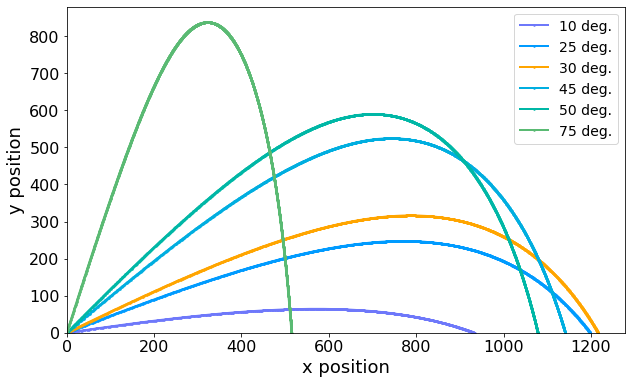

------------------


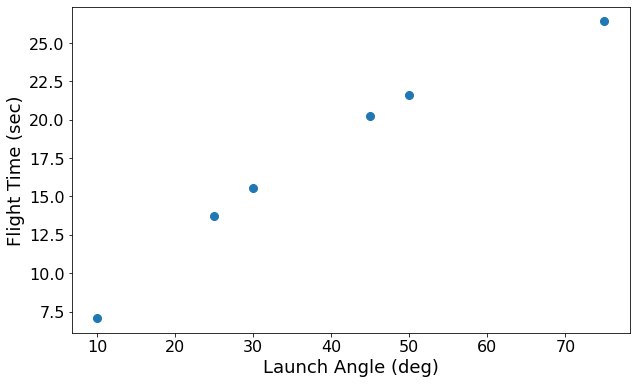

In [186]:



#INITIAL PARAMETERS

duration = 100
time_step = 0.01
num_steps = math.ceil(duration/time_step)+1
print('This is the number of steps: ',num_steps)

#Drag parameters
C = 0.5
A = 0.5
p = 1.225
m = 100


D = C*A*p/(2*m)



#Launch parameters for all projectiles(except object 7)
x_position_initial = 0
y_position_initial = 0
velocity_initial = 300

#OBJECT 1 LAUNCH INPUT PARAMETERS
angle_initial = 10


#INITIALIZING BLANK ARRAYS FOR OBJECT 1
x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)



#HERE IS WHERE I WILL IMPLEMENT THE MODEL::
 
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps1, times1 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)




#Creating two objects: 
x1_position, y1_position = x_position, y_position
x1_velocity, y1_velocity = x_velocities, y_velocities




#OBJECT 2 LAUNCH INPUT PARAMETERS

angle_initial = 25



#REINITIALZING ARRAYS FOR OBJECT 2 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps2, times2 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x2_position, y2_position = x_position, y_position
x2_velocity, y2_velocity = x_velocities, y_velocities





#OBJECT 3 LAUNCH INPUT PARAMETERS

angle_initial = 30



#REINITIALZING ARRAYS FOR OBJECT 3 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps3, times3 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x3_position, y3_position = x_position, y_position
x3_velocity, y3_velocity = x_velocities, y_velocities




#OBJECT 4 LAUNCH INPUT PARAMETERS

angle_initial = 45



#REINITIALZING ARRAYS FOR OBJECT 4 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps4, times4 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x4_position, y4_position = x_position, y_position
x4_velocity, y4_velocity = x_velocities, y_velocities






#OBJECT 5 LAUNCH INPUT PARAMETERS

angle_initial = 50



#REINITIALZING ARRAYS FOR OBJECT 5 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps5, times5 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x5_position, y5_position = x_position, y_position
x5_velocity, y5_velocity = x_velocities, y_velocities





#OBJECT 6 LAUNCH INPUT PARAMETERS

angle_initial = 75



#REINITIALZING ARRAYS FOR OBJECT 6 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps6, times6 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x6_position, y6_position = x_position, y_position
x6_velocity, y6_velocity = x_velocities, y_velocities











#calculating flight times
flight_time1, flight_time2 = np.round(time_of_flight(steps1, steps2, time_step), 4)
flight_time3, flight_time4 = np.round(time_of_flight(steps3, steps4, time_step), 4)
flight_time5, flight_time6 = np.round(time_of_flight(steps5, steps6, time_step), 4)






print('Flight time of object 1: ',flight_time1, ' seconds')
print('Flight time of object 2: ',flight_time2, ' seconds')
print('Flight time of object 3: ',flight_time3, ' seconds')
print('Flight time of object 4: ',flight_time4, ' seconds')
print('Flight time of object 5: ',flight_time5, ' seconds')
print('Flight time of object 6: ',flight_time6, ' seconds')





#CREATING PLOT
#this function will calibrate the plot axes to the data:
xlimit, ylimit = plot_axes(x1_position, x2_position, y1_position, y2_position)


#Plotting the x vs y position curves:
xlabel = plt.xlabel(r'x position')
ylabel = plt.ylabel('y position')
plt.plot(x1_position, y1_position,  marker = '.', color = '#6e78fa', markersize = 3, label='10 deg.')
plt.plot(x2_position, y2_position,  marker = '.', color = '#009bff', markersize = 3, label='25 deg.')
plt.plot(x3_position, y3_position,  marker = '.', color = 'orange',     markersize = 3, label='30 deg.')
plt.plot(x4_position, y4_position,  marker = '.', color = '#00aee0', markersize = 3, label='45 deg.')
plt.plot(x5_position, y5_position,  marker = '.', color = '#00b7a6', markersize = 3, label='50 deg.')
plt.plot(x6_position, y6_position,  marker = '.', color = '#5aba73', markersize = 3, label='75 deg.')
plt.legend()
plt.ylim(0,)

plt.xlim(0,)
#plt.ylim(0, ylimit)
plt.show()




#VELOCITY PLOT IS COMMENTED OUT
#This is a plot of the velocity vs time of object 1 (blue) and object 2(orange)
#plt.plot( times1, y1_velocity, marker = '.', color = 'blue', markersize = 7, label='')
#plt.plot( times2, y2_velocity, marker = '.', color = 'orange', markersize = 7, label='')
#plt.show()

print('------------------')

#Plotting flight time as a function of launch angle:
flight_times = [flight_time1, flight_time2, flight_time3, flight_time4, flight_time5, flight_time6]
launch_angles = [10, 25, 30, 45, 50, 75]


xlabel = plt.xlabel(r'Launch Angle (deg)')
ylabel = plt.ylabel('Flight Time (sec)')
plt.scatter(launch_angles, flight_times,  )

plt.show()


HERE IS THE COMPARISON BETWEEN DRAG AND DRAGLESS PROJECTILE MOTION:

This is the number of steps:  15001
D =  4e-05
D =  0
Flight time of object 1:  77.42  seconds
Flight time of object 2:  101.03  seconds


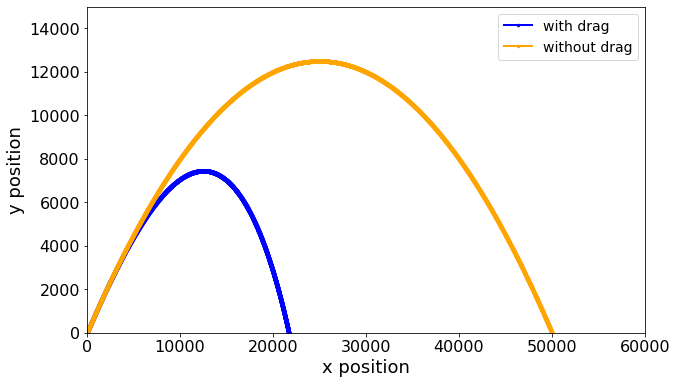

In [187]:

#INITIAL PARAMETERS

duration = 150
time_step = 0.01
num_steps = math.ceil(duration/time_step)+1
print('This is the number of steps: ',num_steps)


#OBJECT 1 LAUNCH INPUT PARAMETERS


D = 0.00004
print('D = ',D)
angle_initial = 45
x_position_initial = 0
y_position_initial = 0
velocity_initial = 700




#INITIALIZING BLANK ARRAYS
x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)



#HERE IS WHERE I WILL IMPLEMENT THE MODEL::
 
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps1, times1 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)





#Creating the first object: 
x1_position, y1_position = x_position, y_position
x1_velocity, y1_velocity = x_velocities, y_velocities




#OBJECT 2 LAUNCH INPUT PARAMETERS

D = 0
print('D = ',D)

angle_initial = 45
x_position_initial = 0
y_position_initial = 0
velocity_initial = 700



#REINITIALZING ARRAYS FOR OBJECT 2 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps2, times2 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x2_position, y2_position = x_position, y_position
x2_velocity, y2_velocity = x_velocities, y_velocities




#calculating flight times
flight_time1, flight_time2 = np.round(time_of_flight(steps1, steps2, time_step), 4)


print('Flight time of object 1: ',flight_time1, ' seconds')
print('Flight time of object 2: ',flight_time2, ' seconds')



#CREATING PLOT
#this function will calibrate the plot axes to the data:
xlimit, ylimit = plot_axes(x1_position, x2_position, y1_position, y2_position)


#Plotting the x vs y position curves:
xlabel = plt.xlabel(r'x position')
ylabel = plt.ylabel('y position')
plt.plot(x1_position, y1_position, marker = '.', color = 'blue', markersize = 5, label='with drag')
plt.plot(x2_position, y2_position,  marker = '.', color = 'orange', markersize = 5, label='without drag')
plt.legend()
plt.xlim(0, xlimit)
plt.ylim(0, ylimit)
plt.show()




#BELOW I HAVE COMMENTED OUT THE PLOTTING OF THE VELOCITIES

#This is a plot of the velocity vs time of object 1 (blue) and object 2(orange)

#xlimit, ylimit = plot_axes(times1, times2, y1_velocity, y2_velocity)

#plt.plot( times1, y1_velocity, marker = '.', color = 'blue', markersize = 5, label='')
#plt.plot( times2, y2_velocity, marker = '.', color = 'orange', markersize = 5, label='')
#plt.xlim(0, xlimit)
#plt.ylim(-ylimit, ylimit)

#plt.show()

Here I will graph and explore objects fired with identical parameters except varying mass:

This is the number of steps:  10001
Flight time of object 1:  0.25  seconds
Flight time of object 2:  10.53  seconds
Flight time of object 3:  26.3  seconds
Flight time of object 4:  56.67  seconds
Flight time of object 5:  88.76  seconds
Flight time of object 6:  99.46  seconds


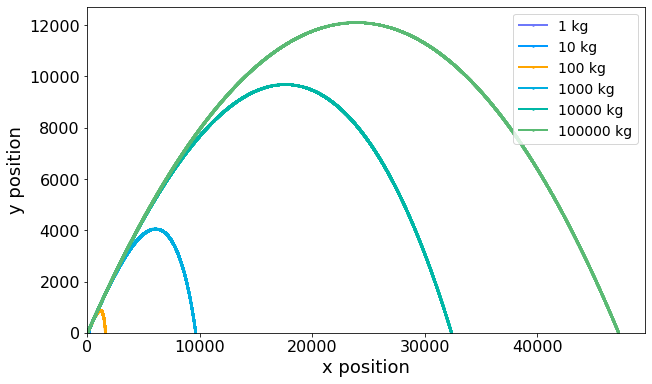

In [188]:
#INITIAL PARAMETERS

duration = 100
time_step = 0.01
num_steps = math.ceil(duration/time_step)+1
print('This is the number of steps: ',num_steps)

#Drag parameters
C = 0.5
A = 0.5
p = 1.225





#Launch parameters for all projectiles

x_position_initial = 0
y_position_initial = 0
velocity_initial = 700
angle_initial = 45

#OBJECT 1 LAUNCH INPUT PARAMETERS
m = 1

D = C*A*p/(2*m)




#INITIALIZING BLANK ARRAYS FOR OBJECT 1
x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)



#HERE IS WHERE I WILL IMPLEMENT THE MODEL::
 
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps1, times1 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)




#Creating two objects: 
x1_position, y1_position = x_position, y_position
x1_velocity, y1_velocity = x_velocities, y_velocities




#OBJECT 2 LAUNCH INPUT PARAMETERS
m = 10

D = C*A*p/(2*m)



#REINITIALZING ARRAYS FOR OBJECT 2 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps2, times2 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x2_position, y2_position = x_position, y_position
x2_velocity, y2_velocity = x_velocities, y_velocities





#OBJECT 3 LAUNCH INPUT PARAMETERS
m = 100

D = C*A*p/(2*m)



#REINITIALZING ARRAYS FOR OBJECT 3 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps3, times3 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x3_position, y3_position = x_position, y_position
x3_velocity, y3_velocity = x_velocities, y_velocities




#OBJECT 4 LAUNCH INPUT PARAMETERS
m = 1000

D = C*A*p/(2*m)



#REINITIALZING ARRAYS FOR OBJECT 4 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps4, times4 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x4_position, y4_position = x_position, y_position
x4_velocity, y4_velocity = x_velocities, y_velocities






#OBJECT 5 LAUNCH INPUT PARAMETERS
m = 10000

D = C*A*p/(2*m)



#REINITIALZING ARRAYS FOR OBJECT 5 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps5, times5 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x5_position, y5_position = x_position, y_position
x5_velocity, y5_velocity = x_velocities, y_velocities





#OBJECT 6 LAUNCH INPUT PARAMETERS
m = 100000

D = C*A*p/(2*m)



#REINITIALZING ARRAYS FOR OBJECT 6 

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps6, times6 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)


x6_position, y6_position = x_position, y_position
x6_velocity, y6_velocity = x_velocities, y_velocities











#calculating flight times
flight_time1, flight_time2 = np.round(time_of_flight(steps1, steps2, time_step), 4)
flight_time3, flight_time4 = np.round(time_of_flight(steps3, steps4, time_step), 4)
flight_time5, flight_time6 = np.round(time_of_flight(steps5, steps6, time_step), 4)






print('Flight time of object 1: ',flight_time1, ' seconds')
print('Flight time of object 2: ',flight_time2, ' seconds')
print('Flight time of object 3: ',flight_time3, ' seconds')
print('Flight time of object 4: ',flight_time4, ' seconds')
print('Flight time of object 5: ',flight_time5, ' seconds')
print('Flight time of object 6: ',flight_time6, ' seconds')





#CREATING PLOT
#this function will calibrate the plot axes to the data:
xlimit, ylimit = plot_axes(x1_position, x2_position, y1_position, y2_position)


#Plotting the x vs y position curves:
xlabel = plt.xlabel(r'x position')
ylabel = plt.ylabel('y position')
plt.plot(x1_position, y1_position,  marker = '.', color = '#6e78fa', markersize = 3, label='1 kg')
plt.plot(x2_position, y2_position,  marker = '.', color = '#009bff', markersize = 3, label='10 kg')
plt.plot(x3_position, y3_position,  marker = '.', color = 'orange',     markersize = 3, label='100 kg')
plt.plot(x4_position, y4_position,  marker = '.', color = '#00aee0', markersize = 3, label='1000 kg')
plt.plot(x5_position, y5_position,  marker = '.', color = '#00b7a6', markersize = 3, label='10000 kg')
plt.plot(x6_position, y6_position,  marker = '.', color = '#5aba73', markersize = 3, label='100000 kg')
plt.legend()
plt.ylim(0,)

plt.xlim(0,)
#plt.ylim(0, ylimit)
plt.show()


Here is the code that generates the tabluated data for a 100 kg sphere launched from a heigh of y = 10^3.5 meters where A = 0.1 m^2, Theta = 0 degrees, initial velocity = 10 m/s and C = 0.5 with p = 1.225 kg/m^3

In [189]:

#INITIAL PARAMETERS

duration = 100
time_step = 0.01
num_steps = math.ceil(duration/time_step)+1
print('This is the number of steps: ',num_steps)

#Drag parameters
C = 0.5
A = 0.1
p = 1.225
m = 100


D = C*A*p/(2*m)



#Launch parameters for all projectiles(except object 7)
x_position_initial = 0
y_position_initial = 10**3.5
velocity_initial = 10

#OBJECT 1 LAUNCH INPUT PARAMETERS
angle_initial = 0


#INITIALIZING BLANK ARRAYS FOR OBJECT 1
x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)



#HERE IS WHERE I WILL IMPLEMENT THE MODEL::
 
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x_position, y_position, x_velocities, y_velocities, steps1, times1 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)




#Creating two objects: 
x1_position, y1_position = x_position, y_position
x1_velocity, y1_velocity = x_velocities, y_velocities

#Using the Dataframes to creat my tab delimited table as data.txt


data = pd.DataFrame({'time (sec)': times1[:], 'x (m)': x1_position[:], 'y (m)': y1_position[:]})
print(data)
data = data.astype(float)
np.savetxt(r'\data\data.txt', data, fmt='%.2f')

This is the number of steps:  10001
      time (sec)       x (m)        y (m)
0           0.00    0.000000  3162.277660
1           0.01    0.100000  3162.277660
2           0.02    0.199997  3162.276680
3           0.03    0.299991  3162.274720
4           0.04    0.399982  3162.271780
...          ...         ...          ...
2962       29.62  214.622583     5.262299
2963       29.63  214.660368     3.608081
2964       29.64  214.698133     1.953722
2965       29.65  214.735880     0.299221
2966       29.66  214.773607    -1.355422

[2967 rows x 3 columns]


BELOW ARE THE PRECISION TESTS OF EULER STEP METHOD:

The first test is comparing the percent difference between the dragless numerical calculation time-of-impact with the analytic solution:

In [190]:
#CONSTANTS:
g = 9.8


#INITIAL PARAMETERS

duration = 65
time_step = 0.001
num_steps = math.ceil(duration/time_step)+1
print('This is the number of steps: ',num_steps)


#OBJECT 1 LAUNCH PARAMETERS

C = 0.5
A = 0.5
p = 1.225
m = 100
d = 0

D = d*C*A*p/(2*m)
print('D = ',D)
angle_initial = 0
x_position_initial = 0
y_position_initial = 20000
velocity_initial = 0

#INITIALIZING BLANK ARRAYS

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#ANALYTIC EQUATION
# t as a function of y:
t = np.sqrt((2*y_position_initial)/g)


#Running functions to created trajectories:
 
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)


x1_position, y1_position, x1_velocities, y1_velocities, trunc, times1 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)





#calculating numerical flight time:
flight_time1 = np.round(trunc * time_step, 4)
print('Flight time object 1: ',flight_time1, ' seconds')

#Calculting analytic flight time
#ANALYTIC EQUATION
# t as a function of y:

t = np.round(np.sqrt((2*y_position_initial)/g), 4)

print('analytic flight time: ', t, ' seconds')

#calculate percent difference:

difference = np.round((np.abs(t-flight_time1))/t*100, 4)

print('percent error is ', difference, '%')


This is the number of steps:  65001
D =  0.0
Flight time object 1:  63.889  seconds
analytic flight time:  63.8877  seconds
percent error is  0.002 %


The second test is comparing numerical calculations for drag and dragless cases:

In [191]:
#this function will calculate the analytic solution with drag for the special vertical falling case:


def analytic_drag(y_position_initial):

  y_peak = y_position_initial
  v_t = np.sqrt((2*m*g)/(C*p*A))
  tau = v_t/g

  t_impact = tau*np.arccosh(np.exp(y_peak/(v_t*tau)))

  

  return(t_impact)

In [194]:
#INITIAL PARAMETERS

duration = 65
time_step = 0.01
num_steps = math.ceil(duration/time_step)+1
print('This is the number of steps: ',num_steps)


#OBJECT 1 LAUNCH INPUT PARAMETERS

C = 0.5
A = 0.5
p = 1.225
m = 100

D = C*A*p/(2*m)
print('D = ',D)
angle_initial = 37
x_position_initial = 0
y_position_initial = 300
velocity_initial = 0




#INITIALIZING BLANK ARRAYS

x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#HERE IS WHERE I WILL IMPLEMENT THE MODEL::
 
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x1_position, y1_position, x1_velocities, y1_velocities, steps1, times1 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)



#OBJECT 2 LAUNCH INPUT PARAMETERS

D = 0
print('D = ',D)

angle_initial = 37
x_position_initial = 0
y_position_initial = 300
velocity_initial = 0



#REINITIALZING ARRAYS FOR OBJECT 2 
x_position, y_position, x_velocities, y_velocities, times = initialize_arrays(num_steps)

#Implementing the position population function for second object:
x_position, y_position, trunc, times = populate_positions(duration,time_step, x_position, y_position)

x2_position, y2_position, x2_velocities, y2_velocities, steps2, times2 = truncate(x_position, y_position, x_velocities, y_velocities, trunc, times)





#calculating flight times
flight_time1, flight_time2 = np.round(time_of_flight(steps1, steps2, time_step), 5)


print('Flight time of object 1: ',flight_time1, ' seconds')
print('Flight time of object 2: ',flight_time2, ' seconds')


#numerical flight time difference:

numerical_diff = np.round(np.abs(flight_time1 - flight_time2), 4)

print('numerical time difference in seconds: ',numerical_diff)




#ANALYTIC SOLUTIONS:

#WITH DRAG:
y_initial_position = 300

t_drag = np.round(analytic_drag(y_initial_position), 4)
print('Analytic Solution flight time = ' , t_drag)


#WITHOUT DRAG:

t_nodrag = np.sqrt((2*y_position_initial)/g)

analytic_diff = np.round(np.abs(t_nodrag-t_drag), 4)
print('analytic time difference in seconds:  ',analytic_diff)


#calculate percent difference:

difference = np.round((np.abs((analytic_diff-numerical_diff))/analytic_diff)*100, 4)

print('percent error is ', difference, '%')


This is the number of steps:  6501
D =  0.00153125
D =  0
Flight time of object 1:  8.44  seconds
Flight time of object 2:  7.83  seconds
numerical time difference in seconds:  0.61
Analytic Solution flight time =  8.4351
analytic time difference in seconds:   0.6105
percent error is  0.0819 %
